<a href="https://colab.research.google.com/github/karencfisher/Hotel-Cancellations/blob/master/notebooks/explore2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget https://raw.githubusercontent.com/karencfisher/Hotel-Cancellations/master/tools.py

--2020-06-16 03:02:01--  https://raw.githubusercontent.com/karencfisher/Hotel-Cancellations/master/tools.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8853 (8.6K) [text/plain]
Saving to: ‘tools.py’

tools.py            100%[===================>]   8.65K  --.-KB/s    in 0s      

2020-06-16 03:02:01 (79.2 MB/s) - ‘tools.py’ saved [8853/8853]



In [0]:
import pandas as pd
pd.set_option('display.max_columns', None)

import tools
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [90]:
# Load the data
url = 'https://raw.githubusercontent.com/karencfisher/Hotel-Cancellations/master/hotel_bookings.csv'
df = pd.read_csv(url)

# Apply functions to mark cases in which guest did not stay as 'no-show', and perform our other 
# wrangling
df = tools.fixTarget(df)
df = tools.wrangleData().transform(df)

# Change no-shows to canceled
df['reservation_status'] = df['reservation_status'].replace('No-Show', 'Canceled')

df.head(10)

,hotel,lead_time,arrival_date_week_number,adults,meal,country,market_segment,is_repeated_guest,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,nights_stay,room_type_changed
0,Resort Hotel,342,27,2.0,BB,PRT,Direct,0,0,3,No Deposit,0,Transient,NaN,0,0,Canceled,NaN,False
1,Resort Hotel,737,27,2.0,BB,PRT,Direct,0,0,4,No Deposit,0,Transient,NaN,0,0,Canceled,NaN,False
2,Resort Hotel,7,27,1.0,BB,GBR,Direct,0,0,0,No Deposit,0,Transient,75.0,0,0,Check-Out,1.0,True
3,Resort Hotel,13,27,1.0,BB,GBR,Corporate,0,0,0,No Deposit,0,Transient,75.0,0,0,Check-Out,1.0,False
4,Resort Hotel,14,27,2.0,BB,GBR,Online TA,0,0,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2.0,False
5,Resort Hotel,14,27,2.0,BB,GBR,Online TA,0,0,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2.0,False
6,Resort Hotel,0,27,2.0,BB,PRT,Direct,0,0,0,No Deposit,0,Transient,107.0,0,0,Check-Out,2.0,False
7,Resort Hotel,9,27,2.0,FB,PRT,Direct,0,0,0,No Deposit,0,Transient,103.0,0,1,Check-Out,2.0,False
8,Resort Hotel,85,27,2.0,BB,PRT,Online TA,0,0,0,No Deposit,0,Transient,82.0,0,1,Canceled,3.0,False
9,Resort Hotel,75,27,2.0,HB,PRT,Offline TA/TO,0,0,0,No Deposit,0,Transient,105.5,0,0,Canceled,3.0,False


In [91]:
df.shape

(119390, 19)

In [92]:
df.isnull().sum()

hotel                              0
lead_time                          0
arrival_date_week_number           0
adults                            16
meal                               0
country                          488
market_segment                     0
is_repeated_guest                  0
previous_cancellations             0
booking_changes                    0
deposit_type                       0
days_in_waiting_list               0
customer_type                      0
adr                            11865
required_car_parking_spaces        0
total_of_special_requests          0
reservation_status                 0
nights_stay                      715
room_type_changed                  0
dtype: int64

In [93]:
df.dtypes

hotel                           object
lead_time                        int64
arrival_date_week_number         int64
adults                         float64
meal                            object
country                         object
market_segment                  object
is_repeated_guest                int64
previous_cancellations           int64
booking_changes                  int64
deposit_type                    object
days_in_waiting_list             int64
customer_type                   object
adr                            float64
required_car_parking_spaces      int64
total_of_special_requests        int64
reservation_status              object
nights_stay                    float64
room_type_changed                 bool
dtype: object

In [94]:
df.describe()

,lead_time,arrival_date_week_number,adults,is_repeated_guest,previous_cancellations,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,nights_stay
count,119390.000000,119390.000000,119374.000000,119390.000000,119390.000000,119390.000000,119390.000000,107525.000000,119390.000000,119390.000000,118675.000000
mean,104.011416,27.165173,1.853343,0.031912,0.087118,0.221124,2.321149,108.711632,0.062518,0.571363,3.448553
std,106.863097,13.605138,0.488802,0.175767,0.844336,0.652306,17.594721,42.864696,0.245291,0.792798,2.551211
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,1.000000
25%,18.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,76.500000,0.000000,0.000000,2.000000
50%,69.000000,28.000000,2.000000,0.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000,3.000000
75%,160.000000,38.000000,2.000000,0.000000,0.000000,0.000000,0.000000,130.000000,0.000000,1.000000,4.000000
max,737.000000,53.000000,4.000000,1.000000,26.000000,21.000000,391.000000,300.000000,8.000000,5.000000,69.000000


In [95]:
df.describe(exclude='number')

,hotel,meal,country,market_segment,deposit_type,customer_type,reservation_status,room_type_changed
count,119390,119390,118902,119390,119390,119390,119390,119390
unique,2,4,177,8,3,4,2,2
top,City Hotel,BB,PRT,Online TA,No Deposit,Transient,Check-Out,False
freq,79330,92310,48590,56477,104641,89613,74460,104473


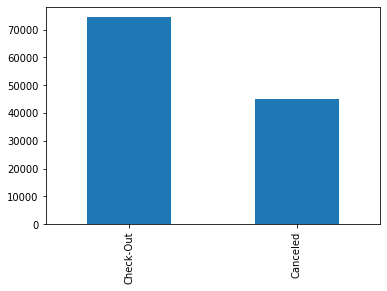

In [0]:
df['reservation_status'].value_counts().plot.bar();

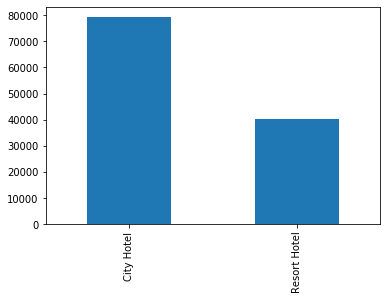

In [0]:
df['hotel'].value_counts().plot.bar();

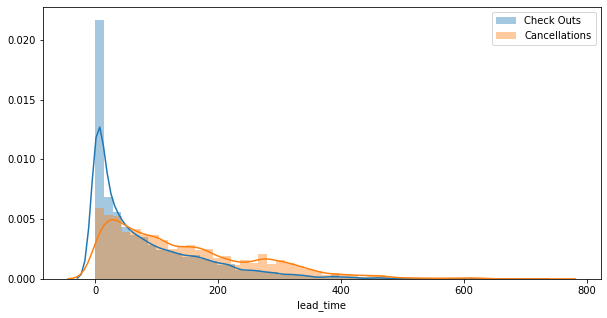

In [0]:
plt.figure(figsize=(10,5))
sns.distplot(df[df['reservation_status'] == 'Check-Out']['lead_time'], label='Check Outs')
sns.distplot(df[df['reservation_status'] == 'Canceled']['lead_time'], label='Cancellations')
plt.legend();

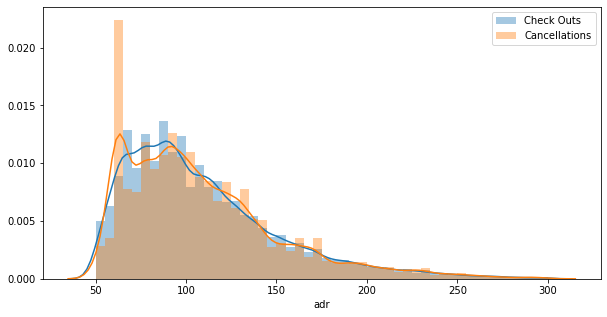

In [0]:
plt.figure(figsize=(10,5))
sns.distplot(df[(df['adr'] < 500) & (df['reservation_status'] == 'Check-Out')]['adr'], label='Check Outs')
sns.distplot(df[(df['adr'] < 500) & (df['reservation_status'] == 'Canceled')]['adr'], label='Cancellations')
plt.legend();

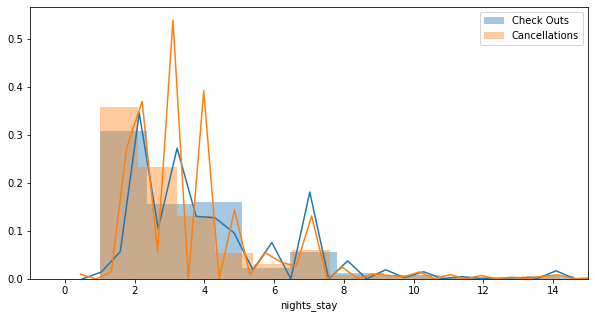

In [80]:
plt.figure(figsize=(10,5))
sns.distplot(df[df['reservation_status'] == 'Check-Out']['nights_stay'], label='Check Outs')
sns.distplot(df[df['reservation_status'] == 'Canceled']['nights_stay'], label='Cancellations')
plt.xlim(-1, 15)
plt.legend();

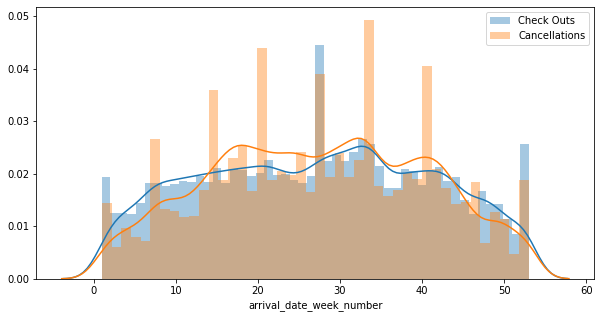

In [0]:
plt.figure(figsize=(10,5))
sns.distplot(df[df['reservation_status'] == 'Check-Out']['arrival_date_week_number'], label='Check Outs')
sns.distplot(df[df['reservation_status'] == 'Canceled']['arrival_date_week_number'], label='Cancellations')
plt.legend();

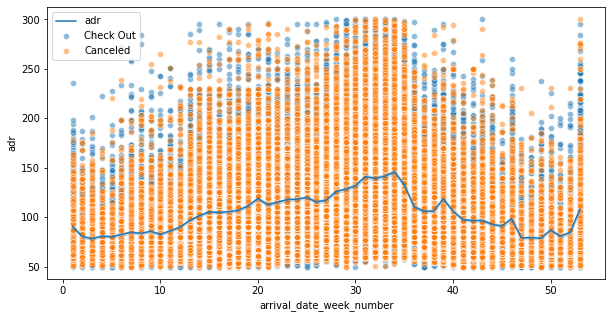

In [78]:
plt.figure(figsize=(10,5))
cond = df['reservation_status'] == 'Check-Out'
sns.scatterplot(data=df[cond], x='arrival_date_week_number', y='adr', label='Check Out', alpha=.5)
sns.scatterplot(data=df[~cond], x='arrival_date_week_number', y='adr', label='Canceled', alpha=.5)
sns.lineplot(data=df, x='arrival_date_week_number', y='adr', label='adr')
plt.legend();

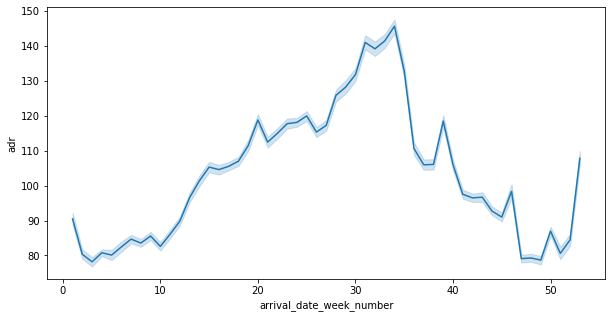

In [72]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='arrival_date_week_number', y='adr')


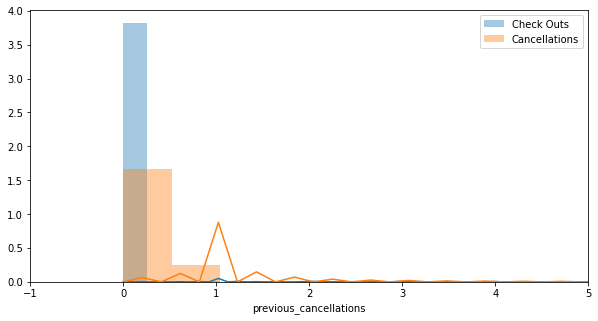

In [0]:
plt.figure(figsize=(10,5))
sns.distplot(df[df['reservation_status'] == 'Check-Out']['previous_cancellations'], label='Check Outs')
sns.distplot(df[df['reservation_status'] == 'Canceled']['previous_cancellations'], label='Cancellations')
plt.xlim(-1, 5)
plt.legend();

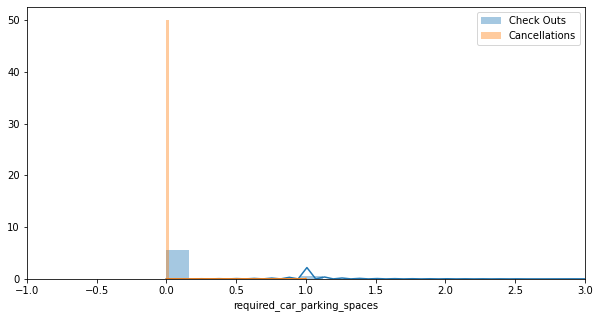

In [0]:
plt.figure(figsize=(10,5))
sns.distplot(df[df['reservation_status'] == 'Check-Out']['required_car_parking_spaces'], label='Check Outs')
sns.distplot(df[df['reservation_status'] == 'Canceled']['required_car_parking_spaces'], label='Cancellations')
plt.xlim(-1, 3)
plt.legend();

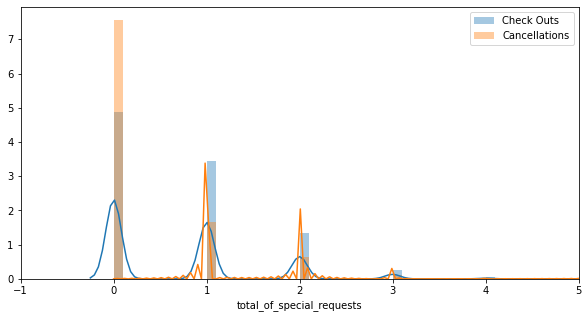

In [0]:
plt.figure(figsize=(10,5))
sns.distplot(df[df['reservation_status'] == 'Check-Out']['total_of_special_requests'], label='Check Outs')
sns.distplot(df[df['reservation_status'] == 'Canceled']['total_of_special_requests'], label='Cancellations')
plt.xlim(-1, 5)
plt.legend();

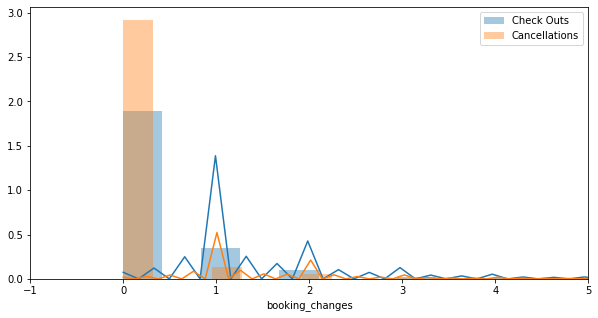

In [0]:
plt.figure(figsize=(10,5))
sns.distplot(df[df['reservation_status'] == 'Check-Out']['booking_changes'], label='Check Outs')
sns.distplot(df[df['reservation_status'] == 'Canceled']['booking_changes'], label='Cancellations')
plt.xlim(-1, 5)
plt.legend();

In [54]:
ms_status = pd.crosstab(df['market_segment'], df['reservation_status'])
ms_status

reservation_status,Canceled,Check-Out
market_segment,,
Aviation,57,180
Complementary,111,632
Corporate,1045,4250
Direct,2067,10539
Groups,12133,7678
Offline TA/TO,8474,15745
Online TA,21041,35436
Undefined,2,0


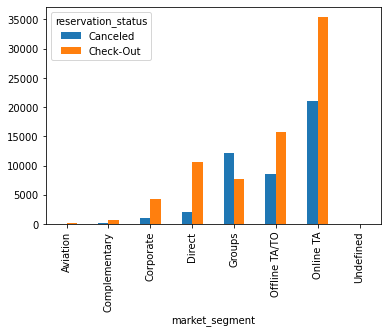

In [55]:
ms_status.plot.bar();

In [57]:
ct_status = pd.crosstab(df['customer_type'], df['reservation_status'])
ct_status

reservation_status,Canceled,Check-Out
customer_type,,
Contract,1281,2795
Group,64,513
Transient,37105,52508
Transient-Party,6480,18644


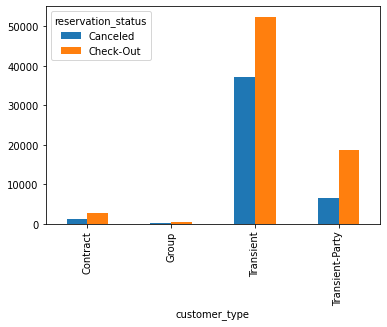

In [58]:
ct_status.plot.bar();

In [59]:
dt_status = pd.crosstab(df['deposit_type'], df['reservation_status'])
dt_status

reservation_status,Canceled,Check-Out
deposit_type,,
No Deposit,30400,74241
Non Refund,14494,93
Refundable,36,126


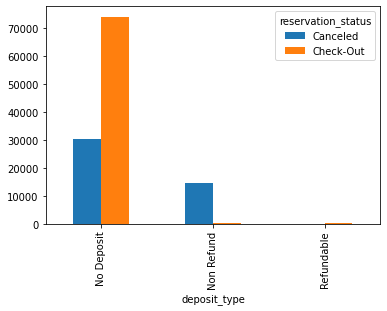

In [60]:
dt_status.plot.bar();

In [61]:
ht_status = pd.crosstab(df['hotel'], df['reservation_status'])
ht_status

reservation_status,Canceled,Check-Out
hotel,,
City Hotel,33415,45915
Resort Hotel,11515,28545


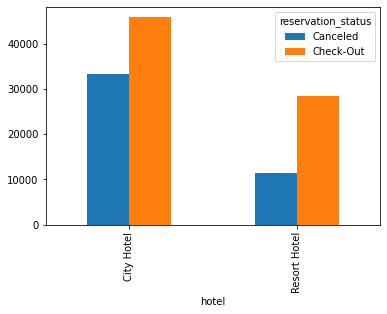

In [62]:
ht_status.plot.bar();

In [89]:
from scipy.stats import chi2_contingency, chi2
result = chi2_contingency(ht_status)
print("Chi-square statistic: %f p-value: %f" % (result[0], result[1]))

Chi-square statistic: 2028.902136 p-value: 0.000000


In [81]:
ad_status = pd.crosstab(df['adults'], df['reservation_status'])
ad_status

reservation_status,Canceled,Check-Out
adults,,
0.0,168,235
1.0,6867,16160
2.0,35695,53985
3.0,2168,4034
4.0,16,46


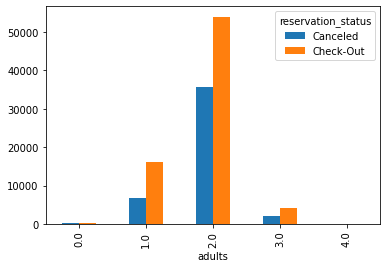

In [82]:
ad_status.plot.bar();

In [84]:
rtc_status = pd.crosstab(df['room_type_changed'], df['reservation_status'])
rtc_status

reservation_status,Canceled,Check-Out
room_type_changed,,
False,43745,60728
True,1185,13732


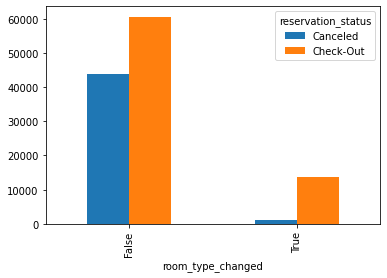

In [85]:
rtc_status.plot.bar()

In [88]:
from scipy.stats import chi2_contingency, chi2
result = chi2_contingency(rtc_status)
print("Chi-square statistic: %f p-value: %f" % (result[0], result[1]))

Chi-square statistic: 6400.519470 p-value: 0.000000


In [97]:
c_status = pd.crosstab(df['country'], df['reservation_status'])
c_status

reservation_status,Canceled,Check-Out
country,,
ABW,0,2
AGO,206,156
AIA,0,1
ALB,2,10
AND,5,2
...,...,...
VGB,1,0
VNM,2,6
ZAF,31,49
